# Inaugural Project

To start of we will import all libraires needed for the project. Furthermore we will import the economic model given from the lectures, though with 1 change. The change being that model has been defined as an if statement containing all functions for home productions compared to the orginal file where it was only defined for when $\sigma = 1$.

Here is the code that has replaced the original in 'HouseholdSpecializationModel.py' (We check for if we divide by 0, to avoid the '**ZeroDivisionError**'. This is because in Python division by 0 is not allowed)

```python
# b. home production
if par.sigma == 1:
    H = HM**(1-par.alpha)*HF**par.alpha
elif par.sigma == 0:
    H = np.minimum(HM,HF)

    # We check if we divide by zero
elif HM == 0 or HF == 0:
    H = 0
else:
    H = (
        (1-par.alpha)*HM**((par.sigma-1)/par.sigma)
        +par.alpha*HF**((par.sigma-1)/par.sigma))
        **((par.sigma/(par.sigma-1))
        )

In [1]:
# Importing relevant library for calculations and plotting
import numpy as np
from matplotlib import pyplot as plt

# Importing code for economic model
import HouseholdSpecializationModel as model

# Defining model as 'HouseholdSpecializationModelClass'
model = model.HouseholdSpecializationModelClass()

# Question 1

To solve this, we can use tuples, for loop and plot functions. The steps being:
1. Define 2 tuples for each value of $\alpha$ and $\sigma$, and also define 2 empty tuples for $H_M$ and $H_M$.
2. Creating a for loop to solve the function for each value of $\alpha$ and $\sigma$, and storing it into the to before mentioned empty tuples.
3. Print out all values for $H_F$ and $H_M$. (We do this to check, if we get the same result when calculating this manually)
4. Define a function to calculate the ratio of $\frac{H_F}{H_M}$.
5. Create a matrix for $\frac{H_F}{H_M}$.
6. Create a for loop to calculate for each comination of $\alpha$ and $\sigma$.
7. Plot everything as line graph, where each line represents a value for $\alpha$. Here the x-axis will be $\sigma$ and the y-axis the $\frac{H_F}{H_M}$ ratio. Furtermore, we will print the $\frac{H_F}{H_M}$ ratio.

c:\Users\ketsi\OneDrive - University of Copenhagen\Desktop\3. semester\Introduction to programming and numerical analysis\projects-2023-kscd\inauguralproject\HouseholdSpecializationModel.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma/(par.sigma-1)))


HF values: (3.0, 2.0, 1.5, 4.5, 4.5, 4.5, 5.5, 6.5, 7.0)
HM values: (5.5, 6.5, 7.0, 4.5, 4.5, 4.5, 3.0, 2.0, 1.5)


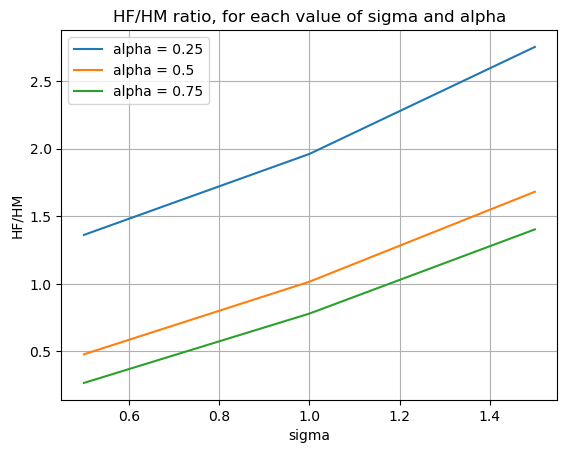

[[1.36180545 1.96067982 2.75208275]
 [0.47901995 1.01556444 1.68095132]
 [0.26724219 0.78000078 1.40261721]]


In [2]:
# Defining values for alpha and sigma
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

# Creating empty tuples for HM and HF
HF_values = []
HM_values = []

# Prining values 
for alpha in alpha_vals:
    for sigma in sigma_vals:
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model
        result = model.solve_discrete()

        # Appeding values to list for HF and HM
        HF_values.append(result.HF)
        HM_values.append(result.HM)

# Printing tuples
print("HF values:", tuple(HF_values))
print("HM values:", tuple(HM_values))

# Defining a function to calculate the ratio of HF/HM
def HF_HM(alpha, sigma):
    return ((1 + alpha**2) / (2*alpha)) * np.sqrt(1 + (4*alpha*sigma**2) / (1 + alpha**2)) - 1

# Creating a matrix for the ratio of HF/HM
HF_HM_ratio = np.zeros((len(alpha_vals), len(sigma_vals)))

# Creating a for loop, to calculate each combination of alpha and sigma in the model
for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        HF_HM_ratio[i, j] = HF_HM(alpha, sigma)

# Line plot for each value of alpha
for i, alpha in enumerate(alpha_vals):
    plt.plot(sigma_vals, HF_HM_ratio[i,:], label=f'alpha = {alpha}')
    
# Ploting label names and graph titel
plt.xlabel('sigma')
plt.ylabel('HF/HM')
plt.title('HF/HM ratio, for each value of sigma and alpha')

# Adding a legends
plt.legend()

# Adding gridlines
plt.grid()

# Show the plot
plt.show()

# Printing HF/HM ratio
print(HF_HM_ratio)

# Question 2

Explain your code and procedure

ValueError: x and y must be the same size

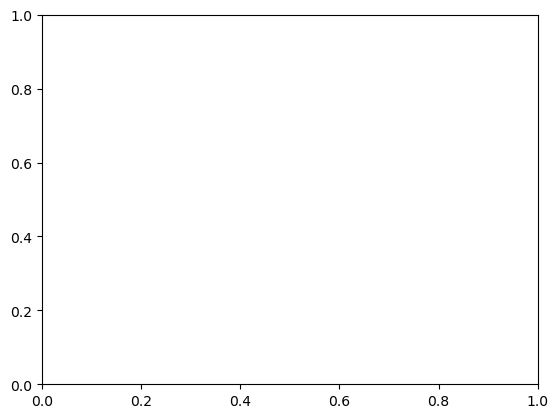

In [3]:
# Defining values for wF and wM
wF_value = [0.8, 0.9, 1.0, 1.1, 1.2]
wM_value = 1.0



# Defining an empty tuple for wF and wM ratio
wF_wM_ratio = []

# Creating a for loop to calculate the ratio
for wF in wF_value:
    wF_wM_ratio.append(wF / wM_value)

# Taking the natural log of HM and HM ratio, and for wF and wM ratio
log_wF_wM_ratio = np.log(wF_wM_ratio)
log_HF_HM_ratio = np.log(HF_HM_ratio)

# Crating scatter plot
plt.scatter(log_wF_wM_ratio, log_HF_HM_ratio)

# Label x and y axis
plt.xlabel('Log(wF/wM)')
plt.ylabel('Log(HF/HM)')

# Adding gridlines
plt.grid()

# Show the plot
plt.show()

# Question 3

Explain your code and procedure

ADD CONCISE CONLUSION.